In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


In [ ]:
!kaggle datasets download -d kartik2112/fraud-detection


Dataset URL: https://www.kaggle.com/datasets/kartik2112/fraud-detection
License(s): CC0-1.0
fraud-detection.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
!unzip fraud-detection.zip -d fraud-detection


Archive:  fraud-detection.zip
replace fraud-detection/fraudTest.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace fraud-detection/fraudTrain.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: n


In [ ]:
import pandas as pd

df = pd.read_csv("fraud-detection/fraudTrain.csv")
df.head()


,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0


In [ ]:
print(df.isnull().sum())


Unnamed: 0               0
trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
unix_time                0
merch_lat                0
merch_long               0
is_fraud                 0
dtype: int64


In [ ]:
df["trans_date_trans_time"] = pd.to_datetime(df["trans_date_trans_time"])

df["year"] = df["trans_date_trans_time"].dt.year
df["month"] = df["trans_date_trans_time"].dt.month
df["day"] = df["trans_date_trans_time"].dt.day
df["hour"] = df["trans_date_trans_time"].dt.hour
df["minute"] = df["trans_date_trans_time"].dt.minute
df["second"] = df["trans_date_trans_time"].dt.second

df.drop(columns=["trans_date_trans_time"], inplace=True)

df.head()


,Unnamed: 0,cc_num,merchant,category,amt,first,last,gender,street,city,...,unix_time,merch_lat,merch_long,is_fraud,year,month,day,hour,minute,second
0,0,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,...,1325376018,36.011293,-82.048315,0,2019,1,1,0,0,18
1,1,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,...,1325376044,49.159047,-118.186462,0,2019,1,1,0,0,44
2,2,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,Malad City,...,1325376051,43.150704,-112.154481,0,2019,1,1,0,0,51
3,3,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,Boulder,...,1325376076,47.034331,-112.561071,0,2019,1,1,0,1,16
4,4,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,Doe Hill,...,1325376186,38.674999,-78.632459,0,2019,1,1,0,3,6


In [ ]:
categorical_cols = df.select_dtypes(include=['object']).columns
print(categorical_cols)


Index(['merchant', 'category', 'first', 'last', 'gender', 'street', 'city',
       'state', 'job', 'dob', 'trans_num'],
      dtype='object')


In [ ]:
from sklearn.preprocessing import LabelEncoder

label_enc = LabelEncoder()
for col in categorical_cols:
    df[col] = label_enc.fit_transform(df[col])
df

,Unnamed: 0,cc_num,merchant,category,amt,first,last,gender,street,city,...,unix_time,merch_lat,merch_long,is_fraud,year,month,day,hour,minute,second
0,0,2703186189652095,514,8,4.97,162,18,0,568,526,...,1325376018,36.011293,-82.048315,0,2019,1,1,0,0,18
1,1,630423337322,241,4,107.23,309,157,0,435,612,...,1325376044,49.159047,-118.186462,0,2019,1,1,0,0,44
2,2,38859492057661,390,0,220.11,115,381,1,602,468,...,1325376051,43.150704,-112.154481,0,2019,1,1,0,0,51
3,3,3534093764340240,360,2,45.00,163,463,1,930,84,...,1325376076,47.034331,-112.561071,0,2019,1,1,0,1,16
4,4,375534208663984,297,9,41.96,336,149,1,418,216,...,1325376186,38.674999,-78.632459,0,2019,1,1,0,3,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1296670,1296670,30263540414123,499,0,15.56,121,332,1,154,330,...,1371816728,36.841266,-111.690765,0,2020,6,21,12,12,8
1296671,1296671,6011149206456997,2,1,51.70,160,463,1,856,813,...,1371816739,38.906881,-78.246528,0,2020,6,21,12,12,19
1296672,1296672,3514865930894695,599,1,105.93,74,67,1,158,346,...,1371816752,33.619513,-105.130529,0,2020,6,21,12,12,32
1296673,1296673,2720012583106919,509,1,74.90,179,304,1,433,471,...,1371816816,42.788940,-103.241160,0,2020,6,21,12,13,36


In [ ]:
df.dtypes

,0
Unnamed: 0,int64
cc_num,int64
merchant,int64
category,int64
amt,float64
first,int64
last,int64
gender,int64
street,int64
city,int64


is_fraud
0    1289169
1       7506
Name: count, dtype: int64


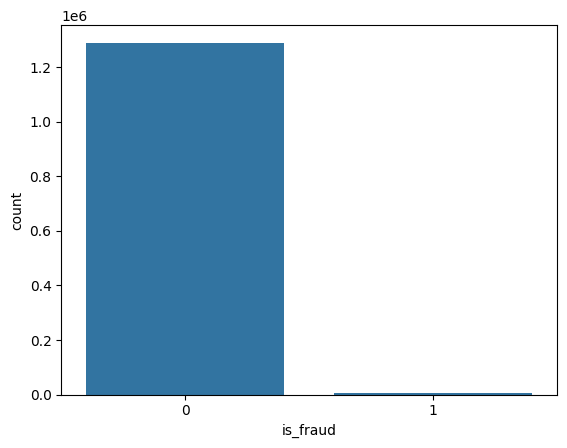

In [ ]:
print(df["is_fraud"].value_counts())
sns.countplot(x="is_fraud", data=df)
plt.show()


In [ ]:
scaler = StandardScaler()
df["amt"] = scaler.fit_transform(df[["amt"]])


In [ ]:
X = df.drop(columns=["is_fraud"])
y = df["is_fraud"]


In [ ]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 27 columns):
 #   Column      Non-Null Count    Dtype  
---  ------      --------------    -----  
 0   Unnamed: 0  1296675 non-null  int64  
 1   cc_num      1296675 non-null  int64  
 2   merchant    1296675 non-null  int64  
 3   category    1296675 non-null  int64  
 4   amt         1296675 non-null  float64
 5   first       1296675 non-null  int64  
 6   last        1296675 non-null  int64  
 7   gender      1296675 non-null  int64  
 8   street      1296675 non-null  int64  
 9   city        1296675 non-null  int64  
 10  state       1296675 non-null  int64  
 11  zip         1296675 non-null  int64  
 12  lat         1296675 non-null  float64
 13  long        1296675 non-null  float64
 14  city_pop    1296675 non-null  int64  
 15  job         1296675 non-null  int64  
 16  dob         1296675 non-null  int64  
 17  trans_num   1296675 non-null  int64  
 18  unix_time   1296675 no

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


In [ ]:
lr = LogisticRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)
print("Logistic Regression:")
print(classification_report(y_test, y_pred_lr))


Logistic Regression:
              precision    recall  f1-score   support

           0       0.99      1.00      1.00    257834
           1       0.00      0.00      0.00      1501

    accuracy                           0.99    259335
   macro avg       0.50      0.50      0.50    259335
weighted avg       0.99      0.99      0.99    259335



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)
print("Decision Tree:")
print(classification_report(y_test, y_pred_dt))


Decision Tree:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    257834
           1       0.81      0.82      0.81      1501

    accuracy                           1.00    259335
   macro avg       0.90      0.91      0.91    259335
weighted avg       1.00      1.00      1.00    259335



In [ ]:
rf = RandomForestClassifier(n_estimators=10)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
print("Random Forest:")
print(classification_report(y_test, y_pred_rf))


Random Forest:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    257834
           1       0.98      0.67      0.79      1501

    accuracy                           1.00    259335
   macro avg       0.99      0.83      0.90    259335
weighted avg       1.00      1.00      1.00    259335



In [ ]:
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_rf))


Accuracy: 0.9979910154819056
Confusion Matrix:
[[257810     24]
 [   497   1004]]
